In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data cleaning:
- Removal of gender \"other\" and smoking \"no info\" due to lack of clarity on actual values (e.g. transgender, decline to state, etc).  Entries would likely not provide insight for feature correlation to category outcome.
- Conversion of gender and smoking history to numeric values using dictionary

In [3]:
dataValDict = {'gender': {'Male': 0, 'Female': 1, 'Other': 3}, 'smoking_history': {'never': 0, 'current': 1, 'ever': 2, 'former': 3, 'not current': 4}}

#Original file is saved as original data.  Df will be 'cleaned' file
df = data[data['gender'] != 'Other']
df = data[data['smoking_history'] != 'No Info']
df = df.replace(dataValDict)
df['gender'] = pd.to_numeric(df['gender'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64184 non-null  int64  
 1   age                  64184 non-null  float64
 2   hypertension         64184 non-null  int64  
 3   heart_disease        64184 non-null  int64  
 4   smoking_history      64184 non-null  int64  
 5   bmi                  64184 non-null  float64
 6   HbA1c_level          64184 non-null  float64
 7   blood_glucose_level  64184 non-null  int64  
 8   diabetes             64184 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.9 MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,1,23.45,5.0,155,0
4,0,76.0,1,1,1,20.14,4.8,155,0
5,1,20.0,0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,1,26.0,0,0,0,34.34,6.5,160,0
99993,1,40.0,0,0,0,40.69,3.5,155,0
99997,0,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


## Training and Test set creation:

Train and test sets were generated using "Train Test Split" with a 30 % test size.  Numpy versions as well as Pandas versions were created to accommodate all test methods.

In [4]:
#Split features from (diabetes) label
features = ['gender','age','hypertension','heart_disease','smoking_history', 'bmi','HbA1c_level','blood_glucose_level']
X = df.loc[:, features]
y = df.loc[:, ['diabetes']]

## Random Forest Algorithm:
### Initial baseline evaluation

In [5]:
#Data will be shuffled before split by default. No stratification. Test size = 30% of set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)
X_train.shape, X_test.shape
y_trn_np = y_train.to_numpy()
y_trn_np_ravel = y_train.to_numpy().ravel()
forest = RandomForestClassifier()

#Fit to training data and labels
forest.fit(X_train, y_trn_np_ravel)

#Predict results and generate confusion matrix
predicted = forest.predict(X_test)
forest.score(X_test, y_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: ", accuracy)

Accuracy:  0.9581948483589531


In [6]:
forest.feature_importances_

array([0.00736452, 0.10235251, 0.01579755, 0.01263849, 0.0202488 ,
       0.12312034, 0.40791969, 0.31055809])

[[17032    83]
 [  722  1419]]


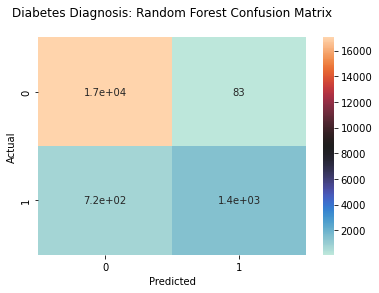

              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98     17115
    Positive       0.94      0.66      0.78      2141

    accuracy                           0.96     19256
   macro avg       0.95      0.83      0.88     19256
weighted avg       0.96      0.96      0.95     19256



In [7]:
confusion = confusion_matrix(y_test, predicted)
print(confusion)
sns.heatmap(confusion, cmap = 'icefire', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Diabetes Diagnosis: Random Forest Confusion Matrix\n')
plt.show()

#Print classification report
target_names = ['Negative', 'Positive']
print(classification_report(y_test, predicted, target_names = target_names))
tp = confusion[0][0]
fp = confusion[0][1]
tn = confusion[1][1]
fn = confusion[1][0]


Results demonstrate relatively poor recall for positive cases but substantially better for negative cases.  Fewer negative cases were misdiagnosed as diabetic from all actual negative cases than actual positive cases misdiagnosed as disease-free.

Precision was good for both positive and negative cases.  Proportionally, a high percentage of the reported positive cases were true positives, and most of the reported negative cases were true negatives. 

### Parameter Optimization Via RandomizedSearchCV
  

In [8]:
def Best_Fit_Randomized(method, param_distributions, X_train, y_train, X_test, y_test):
    rand_search_method = RandomizedSearchCV(method, param_distributions=param_distributions, n_iter=30, verbose=1)
    best_fit = rand_search_method.fit(X_train, y_train)
    predicted = best_fit.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    return best_fit, accuracy, predicted, rand_search_method

In [9]:
n_estimators = np.arange(10, 900, 25)
criterion = ['gini', 'entropy']
max_depth = np.arange(4, 10, 1)
min_samples_split = np.arange(2, 8, 2)
min_samples_leaf = np.arange(1, 4, 1)
min_weight_fraction_leaf = np.arange(0, 0.5, 0.1)
max_features = ['sqrt', 'log2', None]
min_impurity_decrease = np.arange(0.00005, 0.01, 0.002)
bootstrap = [True, False]
class_weight = [None, 'balanced', 'balanced_subsample']

param_distributions = {'n_estimators':n_estimators, 'criterion':criterion, 'max_depth':max_depth,
                       'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,
                       'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_features':max_features,
                       'min_impurity_decrease':min_impurity_decrease,
                       'bootstrap':bootstrap, 'class_weight':class_weight}

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)
X_train.shape, X_test.shape
y_trn_np = y_train.to_numpy()
y_trn_np_ravel = y_train.to_numpy().ravel()
forest_opt = RandomForestClassifier()

In [11]:
best_fit_opt, accuracy_opt, predicted_opt, rand_search_opt = Best_Fit_Randomized(forest_opt, param_distributions, X_train, y_trn_np_ravel, X_test, y_test)
best_params_opt = best_fit_opt.best_params_
best_score_opt = best_fit_opt.best_score_
best_estimator_opt = best_fit_opt.best_estimator_
print("best_params", best_params_opt)
print("best_estimator", best_estimator_opt)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
best_params {'n_estimators': 460, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 4, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.00205, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}
best_estimator RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2', min_impurity_decrease=0.00205,
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=460)


In [12]:
print("best_estimator.feature_importances_", best_estimator_opt.feature_importances_)

best_estimator.feature_importances_ [0.00000000e+00 7.40813562e-02 1.45607691e-02 5.57122673e-03
 4.29937772e-05 2.56058631e-02 5.21680811e-01 3.58456980e-01]


Accuracy: 0.9645209657117031
[[17115     0]
 [  761  1380]]


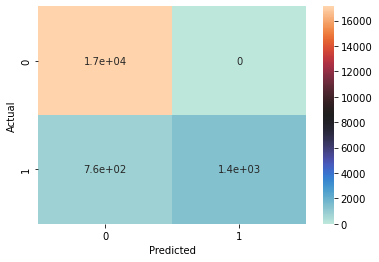

              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98     17115
    Positive       1.00      0.64      0.78      2141

    accuracy                           0.96     19256
   macro avg       0.98      0.82      0.88     19256
weighted avg       0.96      0.96      0.96     19256



In [13]:
print("Accuracy:", best_score_opt)

confusion_opt = confusion_matrix(y_test, predicted_opt)
print(confusion_opt)
sns.heatmap(confusion_opt, cmap = 'icefire', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Print classification report
target_names = ['Negative', 'Positive']
print(classification_report(y_test, predicted_opt, target_names = target_names))

### Feature Evaluation

In [14]:
def Sort_Values(unsorted_array):
    pos = 0
    highest = -1
    ordered_array =[]
    pos_array = []
    while(len(ordered_array) < len(unsorted_array)): #Not all values entered
        for i in range(0, len(unsorted_array), 1):
            if(unsorted_array[i] >= highest):
                highest = unsorted_array[i]
                pos = i
        ordered_array.append(highest)
        pos_array.append(pos)
        unsorted_array[pos] = -2 #Ignore position in the future
        highest = -1
        pos = 0
            
    return pos_array, ordered_array

def Make_Pandas_Cols(head1):
    df = pd.DataFrame(columns=head1)
    for row in range(0, len(head1), 1):  #All cols except labels
        column = head1[row]
    
    return df

def Make_Pandas(array1, array2, head1):
    df = Make_Pandas_Cols(head1)
    df.loc["Unoptimized"] = array1
    df.loc["Optimized"] = array2

    return df

In [15]:
#Sort features and importance percentages from highest to lowest for original and optimized

feature_orig = forest.feature_importances_
feature_opt = best_estimator_opt.feature_importances_
pos_array, ordered_array = Sort_Values(feature_orig)
print("Sorted original feature importance\n", pos_array)
print(ordered_array)
pos_array_opt, ordered_array_opt = Sort_Values(feature_opt)
print("Sorted optimized feature importance\n", pos_array)
print(ordered_array_opt)

Sorted original feature importance
 [6, 7, 5, 1, 4, 2, 3, 0]
[0.407919686535479, 0.31055809179411237, 0.1231203365617223, 0.10235251384685652, 0.020248802818193377, 0.015797553184720727, 0.012638494864571073, 0.007364520394344621]
Sorted optimized feature importance
 [6, 7, 5, 1, 4, 2, 3, 0]
[0.5216808110695136, 0.3584569800203367, 0.07408135616152912, 0.025605863136468746, 0.014560769108298377, 0.005571226726703411, 4.299377715018489e-05, 0.0]


In [16]:
headers = []
unopt = []
opt = []
for i in range(0, len(pos_array), 1):
    headers.append(df.columns[pos_array[i]])
    unopt.append(ordered_array[i] * 100)
    opt.append(ordered_array_opt[i] * 100)
    feature_pd = Make_Pandas(unopt, opt, headers)
    feature_pd = feature_pd.round(decimals=4)
    vals = feature_pd.iloc[1]

<BarContainer object of 8 artists>

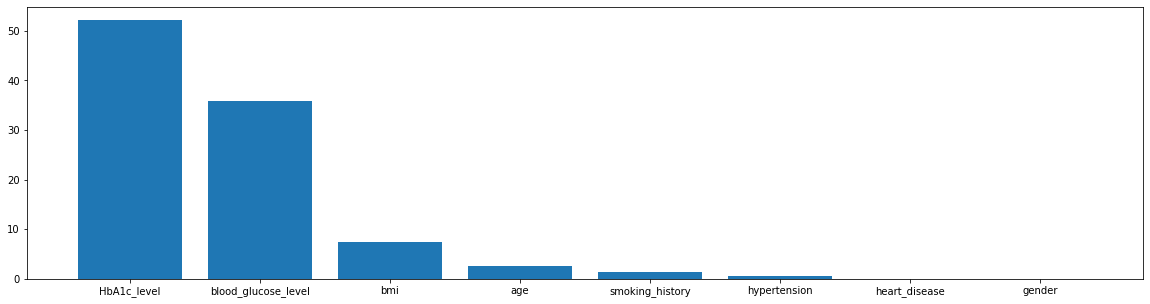

In [17]:
plt.rcParams["figure.figsize"] = (20,5)
plt.title = "Histogram of Feature Relevance to Diabetes Diagnosis"
plt.bar(headers, opt)

Results below demonstrate the final outcomes for actual values vs. predicted.

In [18]:
Final_Outcome = X_test
Final_Outcome['actual'] = y_test
Final_Outcome['predicted'] = predicted_opt
Final_Outcome

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,actual,predicted
29996,1,25.0,0,0,0,21.51,6.0,200,0,0
10568,0,46.0,0,0,3,29.60,5.8,130,0,0
4240,0,35.0,0,0,2,38.10,8.8,126,1,1
249,1,59.0,0,0,0,22.35,4.8,155,0,0
68682,1,80.0,0,0,4,23.10,5.8,160,0,0
...,...,...,...,...,...,...,...,...,...,...
69529,0,34.0,0,0,2,27.32,3.5,80,0,0
74901,1,33.0,0,0,0,37.76,5.7,145,0,0
76322,1,43.0,1,0,0,28.40,5.8,130,0,0
63771,1,49.0,0,0,0,27.32,6.5,160,0,0


###  False Negative Misdiagnosis: True Positive Cases

In [19]:
#False negative cases, misdiagnosed as not diabetic
f_neg_df = Final_Outcome.loc[(Final_Outcome['actual'] == 1) & (Final_Outcome['predicted'] == 0)]
f_neg_df = f_neg_df.sort_values(by=['age'])
f_neg_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,actual,predicted
16306,1,14.0,0,0,0,20.87,6.1,126,1,0
98547,0,14.0,0,0,0,24.25,6.6,160,1,0
56170,1,15.0,0,0,0,21.79,6.6,126,1,0
24275,0,15.0,0,0,0,22.62,6.5,200,1,0
28281,0,16.0,0,0,0,23.30,5.7,160,1,0
...,...,...,...,...,...,...,...,...,...,...
82390,0,80.0,1,0,3,32.90,6.6,140,1,0
80370,1,80.0,0,0,0,26.95,5.7,160,1,0
40007,1,80.0,1,0,0,25.40,6.1,159,1,0
23086,1,80.0,0,0,0,33.06,5.7,140,1,0


#### 1. BMI Level
As shown in the histogram below, a large proportion of cases where BMI was in the mid-20s were misdiagnosed.  The table below shows all cases where bmi is at normal levels, although HbA1c_level and blood_glucose_level are both high.

In [20]:
#Print normal ranges and data ranges
print("Normal BMI: 18.5 to 24.9")
print("Evaluated Range BMI: ", Final_Outcome['bmi'].min(), "to", Final_Outcome['bmi'].max())
print("False Negative Range BMI: ", f_neg_df['bmi'].min(), "to", f_neg_df['bmi'].max(), "\n")
pd.set_option('display.max_rows', None)
f_neg_low_bmi = f_neg_df.loc[(f_neg_df['bmi'] <= 30) & (f_neg_df['HbA1c_level'] > 5.7) & (f_neg_df['blood_glucose_level'] > 99)]

f_neg_low_bmi = f_neg_low_bmi.sort_values(by=['bmi'])
print(len(f_neg_low_bmi))
f_neg_low_bmi

Normal BMI: 18.5 to 24.9
Evaluated Range BMI:  10.4 to 88.76
False Negative Range BMI:  13.73 to 61.02 

292


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,actual,predicted
46958,1,32.0,0,0,1,13.73,6.0,160,1,0
19637,1,80.0,0,0,0,17.37,6.5,130,1,0
80057,1,80.0,1,1,3,17.54,5.8,160,1,0
24087,1,80.0,0,0,0,17.80,6.2,159,1,0
58119,1,49.0,0,1,4,19.37,6.1,155,1,0
21704,0,47.0,0,0,1,19.53,6.5,126,1,0
18038,0,80.0,0,0,4,19.60,6.0,200,1,0
56364,1,80.0,0,0,0,19.71,6.6,160,1,0
4615,1,69.0,0,1,1,20.25,6.2,126,1,0
26207,1,70.0,0,0,4,20.33,6.2,159,1,0


(array([  1.,   3.,   4.,  21.,  38.,  63., 162.,  64.,  67.,  79.,  57.,
         48.,  33.,  27.,  27.,  20.,  19.,  10.,   5.,   3.,   4.,   4.,
          2.]),
 array([13.73      , 15.78608696, 17.84217391, 19.89826087, 21.95434783,
        24.01043478, 26.06652174, 28.1226087 , 30.17869565, 32.23478261,
        34.29086957, 36.34695652, 38.40304348, 40.45913043, 42.51521739,
        44.57130435, 46.6273913 , 48.68347826, 50.73956522, 52.79565217,
        54.85173913, 56.90782609, 58.96391304, 61.02      ]),
 <BarContainer object of 23 artists>)

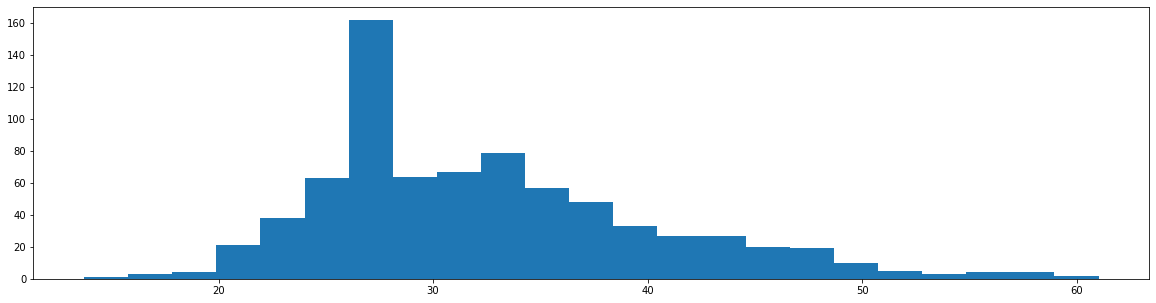

In [21]:
#Create histograms showing number of false negatives by BMI
plt.hist(f_neg_df['bmi'], bins='auto')

In [22]:
print("Approximate misdiagnoses by BMI:", len(f_neg_low_bmi)) 

Approximate misdiagnoses by BMI: 292


#### 2. HbA1c_Level
The table below shows all cases where HbA1c_levels are approximately normal levels, despite high values for indicating features such as HbA1c_level, blood_glucose_levels, and BMI.   As shown in the histogram below, there was a large proportion of cases where HbA1c_levels was normal or slightly high, potentially misdiagnosed.

In [23]:
print("Normal HbA1c: 4% to 5.6%")
print("Evaluated Range HbA1c_level: ", Final_Outcome['HbA1c_level'].min(), "to", Final_Outcome['HbA1c_level'].max())
print("False Negative Range HbA1c_level: ", f_neg_df['HbA1c_level'].min(), "to", f_neg_df['HbA1c_level'].max(), "\n")

f_neg_low_hba1c_hi_glucose = f_neg_df.loc[(f_neg_df['HbA1c_level'] <= 5.7)
                                 & (f_neg_df['blood_glucose_level'] > 99)]
print(len(f_neg_low_hba1c_hi_glucose))
f_neg_low_hba1c_hi_glucose

Normal HbA1c: 4% to 5.6%
Evaluated Range HbA1c_level:  3.5 to 9.0
False Negative Range HbA1c_level:  5.7 to 6.6 

114


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,actual,predicted
28281,0,16.0,0,0,0,23.30,5.7,160,1,0
75395,1,32.0,0,0,0,27.32,5.7,159,1,0
20760,1,35.0,0,0,0,34.27,5.7,159,1,0
36328,0,38.0,0,0,0,26.67,5.7,145,1,0
30121,1,40.0,0,0,0,27.32,5.7,200,1,0
98141,0,40.0,0,0,0,35.35,5.7,155,1,0
79498,0,41.0,0,0,2,47.57,5.7,159,1,0
66592,1,41.0,0,0,0,47.26,5.7,155,1,0
66343,0,41.0,1,0,0,29.65,5.7,130,1,0
52283,0,42.0,1,0,1,25.51,5.7,160,1,0


(array([114., 114.,   0., 102., 115.,   0., 115.,   0.,   0.,  84., 117.]),
 array([5.7       , 5.78181818, 5.86363636, 5.94545455, 6.02727273,
        6.10909091, 6.19090909, 6.27272727, 6.35454545, 6.43636364,
        6.51818182, 6.6       ]),
 <BarContainer object of 11 artists>)

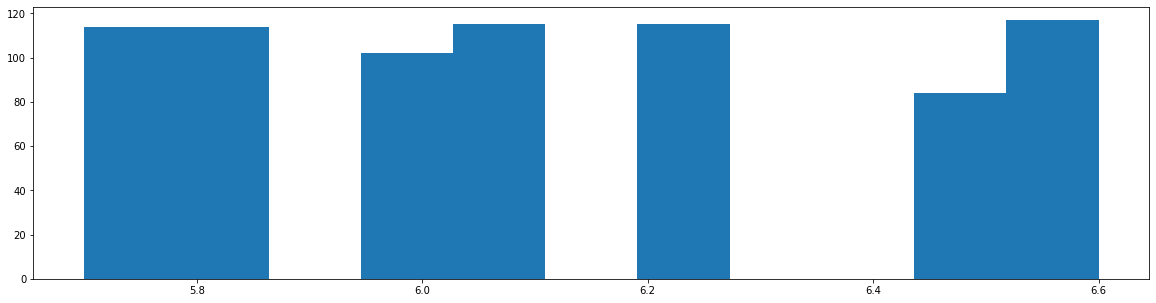

In [24]:
plt.hist(f_neg_df['HbA1c_level'], bins='auto')

In [25]:
print("Approximate misdiagnoses by HbA1c_level:", len(f_neg_low_hba1c_hi_glucose))

Approximate misdiagnoses by HbA1c_level: 114


#### 3.  Age
Some false negatives occurred despite high values for indicating features such as HbA1c_level, blood_glucose_levels, and BMI.  Histograms below show that false positive diagnoses increased significantly for higher ages. False negatives for high ages with respect to lower HbA1c_level, lower BMI, and elevated blood_glucose_level are shown in the table below.

In [26]:
f_neg_low_hba1c_hi_age = f_neg_df.loc[(f_neg_df['age'] > 70) 
                                      & (f_neg_df['HbA1c_level'] >= 5.7)
                                          & (f_neg_df['bmi'] <= 30)]
                                            
f_neg_low_hba1c_hi_age

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,actual,predicted
46710,0,71.0,0,0,3,26.31,5.7,145,1,0
74459,1,71.0,1,1,4,27.32,6.2,130,1,0
79006,1,71.0,0,0,1,29.49,5.8,200,1,0
49572,1,71.0,0,0,1,29.19,6.1,145,1,0
79383,0,71.0,0,0,3,29.60,6.5,159,1,0
50730,0,71.0,0,0,3,29.60,5.8,160,1,0
40398,1,71.0,0,0,0,26.01,6.6,159,1,0
47530,1,71.0,1,0,3,26.77,5.8,145,1,0
55940,0,71.0,0,0,3,24.47,6.6,126,1,0
11362,0,72.0,1,0,0,27.32,6.5,160,1,0


Evaluated Range Age:  0.24 to 80.0
False Negative Range Age:  14.0 to 80.0 



(array([  8.,   7.,   5.,   8.,  12.,  17.,  30.,  38.,  64.,  81.,  70.,
         74.,  76.,  70.,  55., 146.]),
 array([14.   , 18.125, 22.25 , 26.375, 30.5  , 34.625, 38.75 , 42.875,
        47.   , 51.125, 55.25 , 59.375, 63.5  , 67.625, 71.75 , 75.875,
        80.   ]),
 <BarContainer object of 16 artists>)

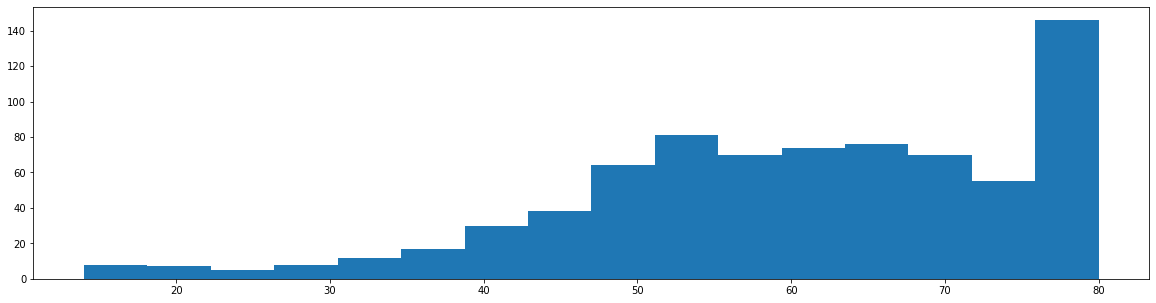

In [27]:
print("Evaluated Range Age: ", Final_Outcome['age'].min(), "to", Final_Outcome['age'].max())
print("False Negative Range Age: ", f_neg_df['age'].min(), "to", f_neg_df['age'].max(), "\n")
plt.hist(f_neg_df['age'], bins='auto')

In [28]:
print("Approximate misdiagnoses by age:", len(f_neg_low_hba1c_hi_age))

Approximate misdiagnoses by age: 130


### Optimized Random Forest Classifier Decision Trees:
A subset of 10 randomly selected trees 

[58, 36, 52, 50, 82, 17, 34, 37, 5, 95]


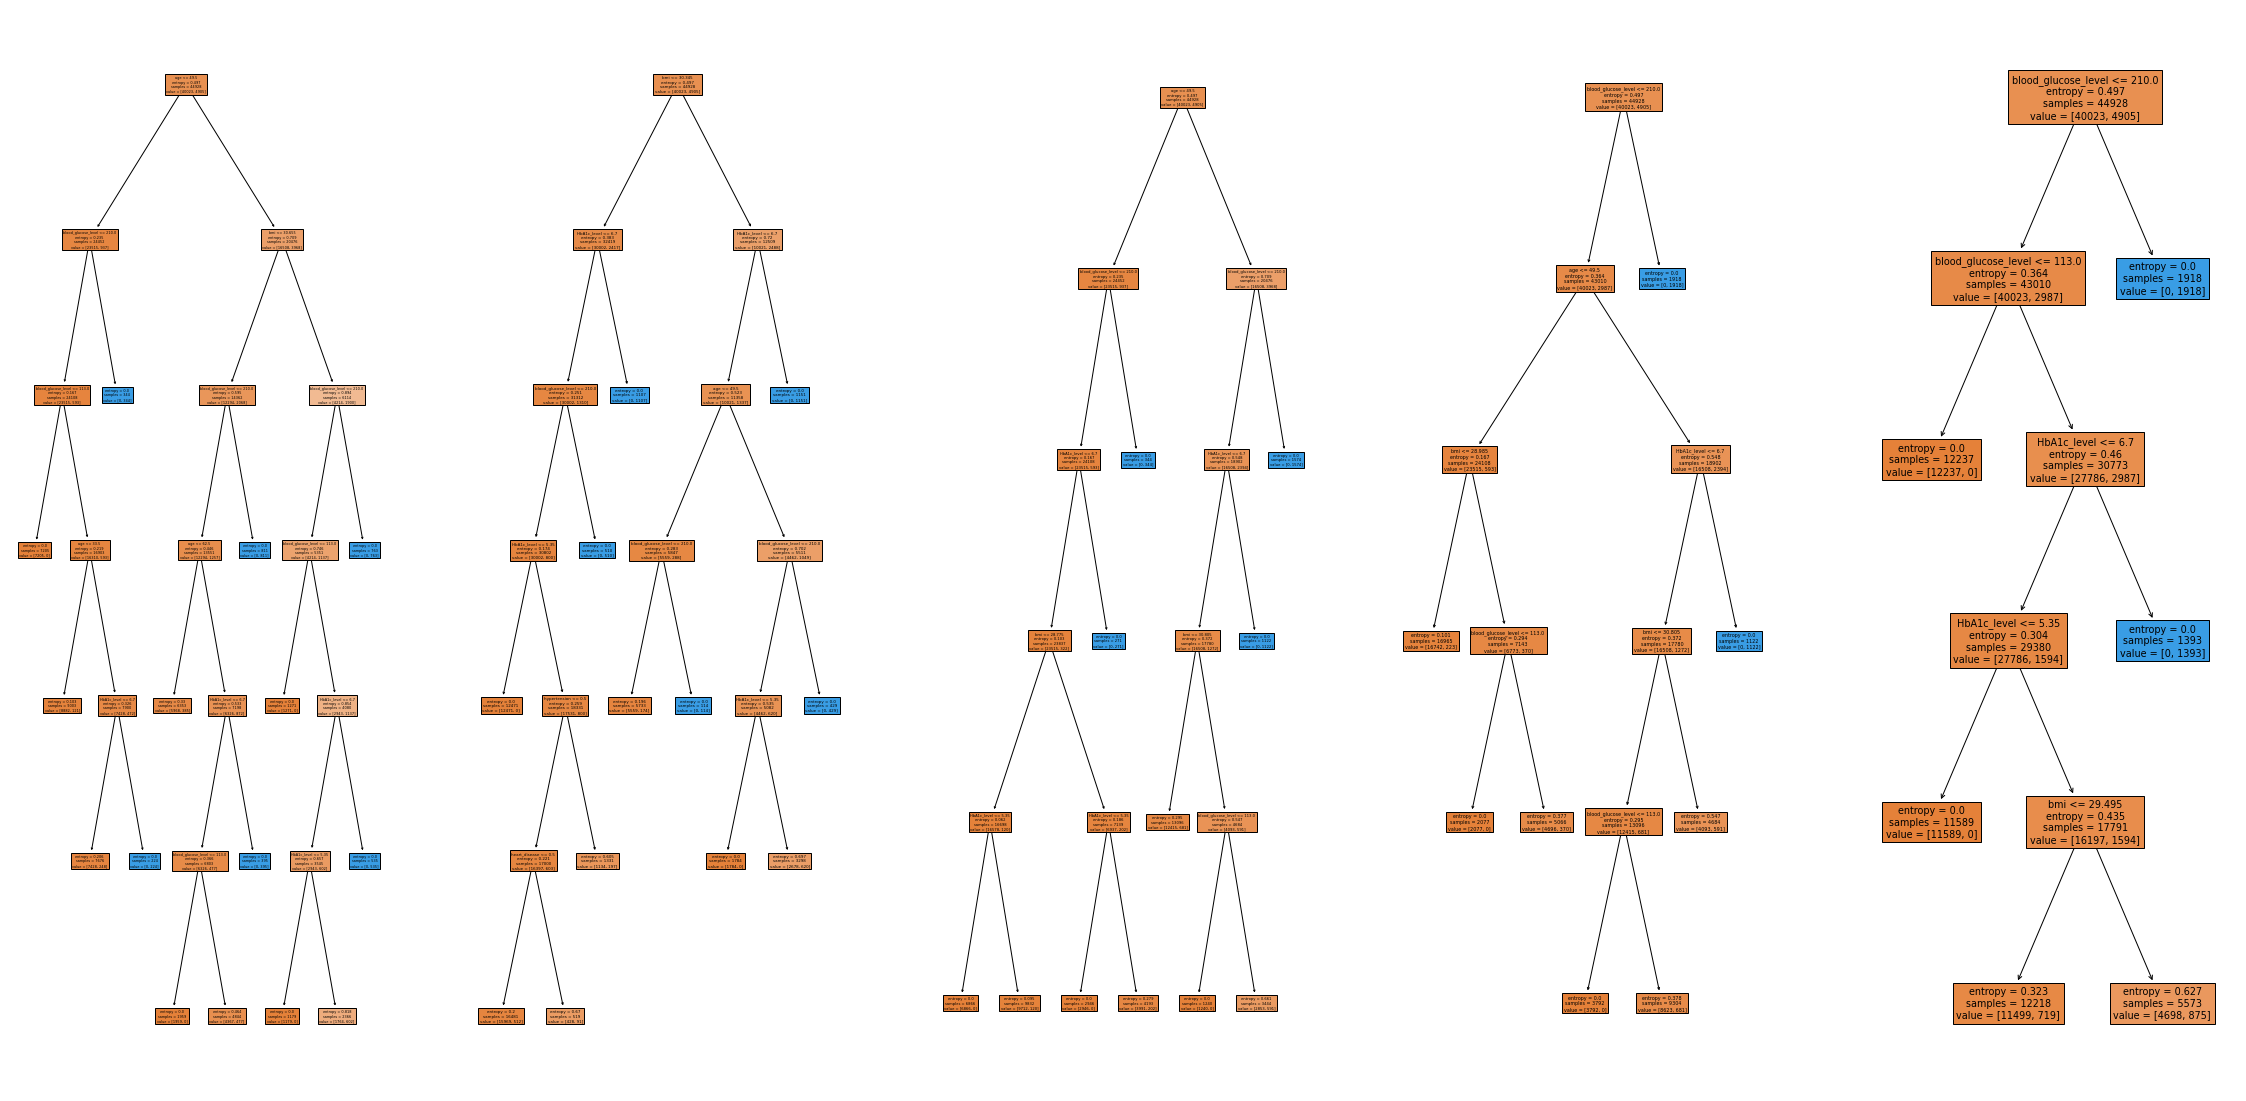

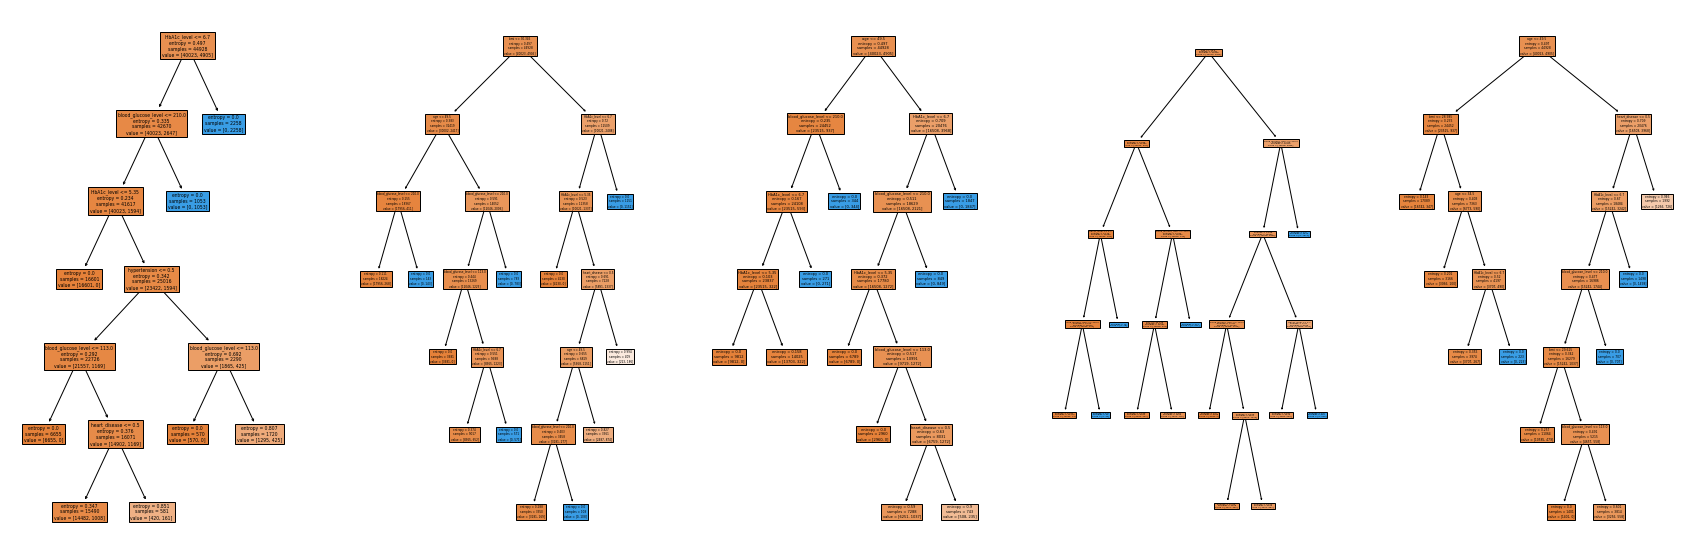

In [29]:
estims = best_estimator_opt.estimators_

#Randomly choose 10 decision trees to display
random_nums = random.sample(range(0, 99), 10)
fig, axes = plt.subplots(nrows = 1, ncols = 5,figsize = (40,20))

print(random_nums)
for i in range(0, 5, 1):
    tree.plot_tree(estims[random_nums[i]], feature_names=X.columns, filled=True, ax = axes[i])
    
fig, axes = plt.subplots(nrows = 1, ncols = 5,figsize = (30,10))
for i in range(5, 10, 1):
    tree.plot_tree(estims[random_nums[i]], feature_names=X.columns, filled=True, ax = axes[i-5])